In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293378 sha256=0f2cd4274e70c14c262aee005b3f1a3837c346d7884856c192cd350ac1b3cd77
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

start = '2012-01-01'
end = '2022-12-21'

stock = 'GOOG'

df = yf.download(stock,start,end)

df.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
2012-01-10,15.684959,15.785831,15.365158,15.520326,15.520326,176483032
2012-01-11,15.529292,15.675993,15.470015,15.590563,15.590563,96359832
2012-01-12,15.721572,15.763166,15.604012,15.682219,15.682219,75289148
2012-01-13,15.598035,15.615220,15.468520,15.566403,15.566403,92637933


In [4]:
#NOw we reset the index so that the index is numbers not dates
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [5]:
#Moving average of 100 days
ma_100_days = df.Close.rolling(100).mean()

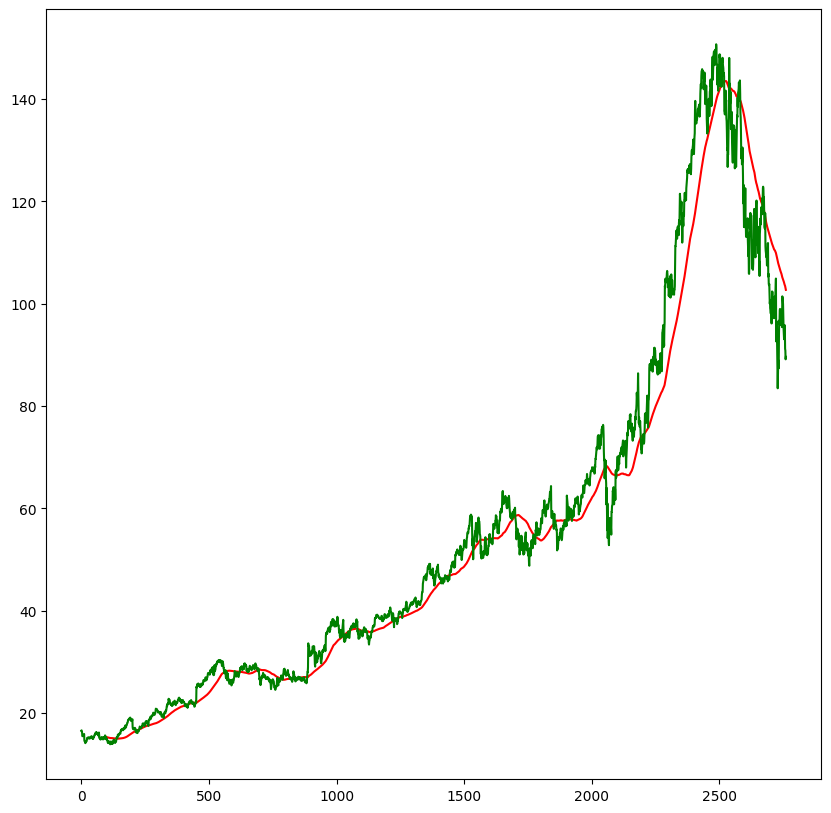

In [7]:
plt.figure(figsize=(10,10))
plt.plot(ma_100_days,'r')
plt.plot(df.Close,'g')
plt.show()

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df_train = pd.DataFrame(df.Close[0: int(len(df)*0.80)])
df_test = pd.DataFrame(df.Close[int(len(df)*0.80): len(df)])

df_train.shape
df_test.shape

(553, 1)

In [16]:
df_train.shape[0]

2208

In [17]:
df_test.shape[0]

553

In [21]:
#Now perform sclaing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_train_scaled = scaler.fit_transform(df_train)

x = []
y = []
for i in range(100, df_train_scaled.shape[0]):
    x.append(df_train_scaled[i-100:i])
    y.append(df_train_scaled[i,0])

x,y = np.array(x), np.array(y)

    
import keras
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x,y, epochs=10, batch_size=32, verbose=1)



Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step - loss: 0.0677
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - loss: 0.0072
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - loss: 0.0070
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - loss: 0.0058
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - loss: 0.0053
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - loss: 0.0051
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - loss: 0.0048
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - loss: 0.0051
Epoch 9/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - loss: 0.0041
Epoch 10/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - loss: 0.0040


In [22]:
pas_100_days = df_train.tail(100)
df_test = pd.concat([pas_100_days,df_test],ignore_index=True)
df_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [23]:
#NOW scaling it
df_test_scaled = scaler.fit_transform(df_test)

x = []
y = []

for i in range(100, df_test_scaled.shape[0]):
    x.append(df_test_scaled[i-100:i])
    y.append(df_test_scaled[i,0])
    
#Now converting it into arrays

x,y, = np.array(x),np.array(y)
y_predict = model.predict(x)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step


In [24]:
scaler.scale_

array([0.01208985])

In [27]:
scale = 1/scaler.scale_

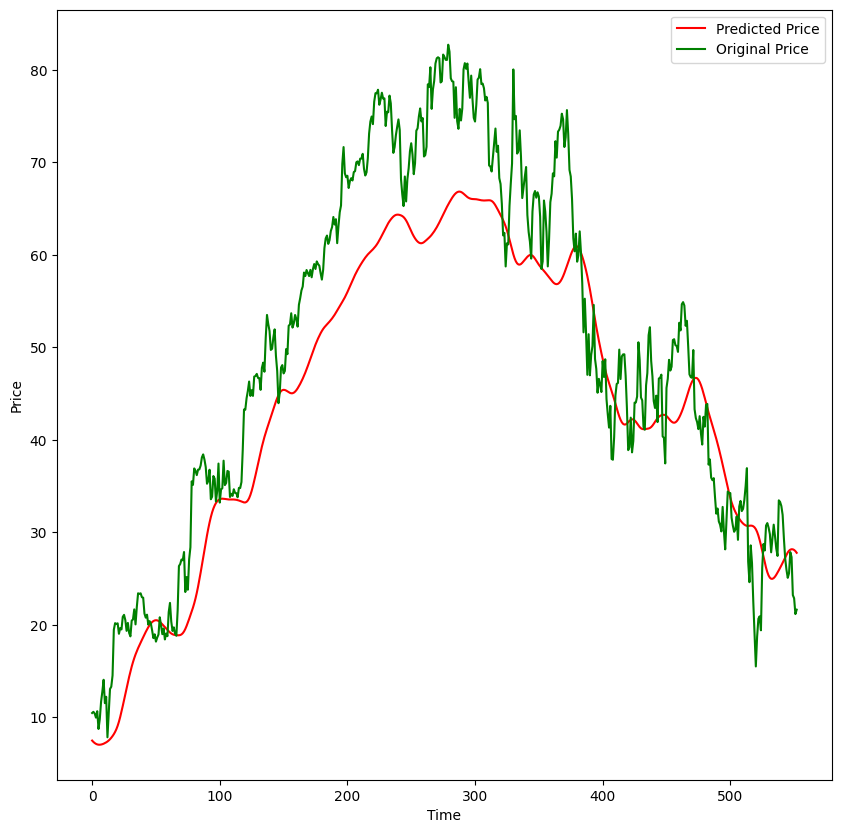

In [29]:
y_predict = y_predict*scale
y = y*scale
plt.figure(figsize=(10,10))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
model.save('stock model.keras')